
# **Libraries**

In [ ]:
!pip install neattext

In [ ]:
import pandas as pd
import neattext
import neattext.functions as nfx
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# **Dataset**

In [ ]:
data=pd.read_csv("udemy_courses.csv")
data


,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...,...
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,True,100,1040,14,21,All Levels,2.0,2016-06-14T17:36:46Z,Web Development
3674,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,25,306,3,42,Beginner Level,3.5,2017-03-10T22:24:30Z,Web Development
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40,513,169,48,All Levels,3.5,2015-12-30T16:41:42Z,Web Development
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50,300,31,38,All Levels,3.0,2016-08-11T19:06:15Z,Web Development


# **Feature selection**

In [ ]:
Data1= data[['subject','is_paid','num_subscribers','price']]
Data1.head(10)

,subject,is_paid,num_subscribers,price
0,Business Finance,True,2147,200
1,Business Finance,True,2792,75
2,Business Finance,True,2174,45
3,Business Finance,True,2451,95
4,Business Finance,True,1276,200
5,Business Finance,True,9221,150
6,Business Finance,True,1540,65
7,Business Finance,True,2917,95
8,Business Finance,True,5172,195
9,Business Finance,True,827,200


In [ ]:
train_outcome = pd.crosstab(index=data["is_paid"],columns="count")
train_outcome # This table provides a quick summary of how many entries are paid vs. unpaid.

col_0,count
is_paid,
False,310
True,3368


# **Data Training**

In [ ]:
#column and variable we use for training
subject = {'Web Development': 1 ,'Business Finance': 2, 'Musical Instruments': 3, 'Graphic Design': 4}
Data1.subject = [subject[item] for item in Data1.subject]
print(Data1)

      subject  is_paid  num_subscribers  price
0           2     True             2147    200
1           2     True             2792     75
2           2     True             2174     45
3           2     True             2451     95
4           2     True             1276    200
...       ...      ...              ...    ...
3673        1     True             1040    100
3674        1     True              306     25
3675        1     True              513     40
3676        1     True              300     50
3677        1     True              901     45

[3678 rows x 4 columns]


<ipython-input-511-dfdf0e468b68>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data1.subject = [subject[item] for item in Data1.subject]


In [ ]:
print("valeurs nulle :",Data1.isnull().values.any(),"\n") #test

valeurs nulle : False 



In [ ]:
Y = Data1['is_paid']
X = Data1.drop(columns=['is_paid'])
print('X shape: ', X.shape)
print('Y shape: ', Y.shape)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=8)
print('X train shape: ', X_train.shape)
print('Y train shape: ', Y_train.shape)
print('X test shape: ', X_test.shape)
print('Y test shape: ', Y_test.shape)

X shape:  (3678, 3)
Y shape:  (3678,)
X train shape:  (2942, 3)
Y train shape:  (2942,)
X test shape:  (736, 3)
Y test shape:  (736,)


In [ ]:
X_test


,subject,num_subscribers,price
1441,4,238,20
2344,3,59,40
596,2,218,100
385,2,1076,25
360,2,1121,0
...,...,...,...
271,2,1459,35
2621,1,24861,200
313,2,14,40
3281,1,1018,145


In [ ]:
Y_test

,is_paid
1441,True
2344,True
596,True
385,True
360,False
...,...
271,True
2621,True
313,True
3281,True


In [ ]:
X_train

,subject,num_subscribers,price
2318,3,80,45
733,2,3917,50
2177,3,3167,0
755,2,2080,0
2127,3,65,20
...,...,...,...
2181,3,4452,0
2409,3,384,85
2033,3,2558,95
1364,4,867,25


In [ ]:
Y_train

,is_paid
2318,True
733,True
2177,False
755,False
2127,True
...,...
2181,False
2409,True
2033,True
1364,True


In [ ]:
#the model
randforcla = RandomForestClassifier(n_estimators=100) #number of trees in the forest
randforcla.fit(X_train, Y_train)# We train model
Y_predict = randforcla.predict(X_test)# We predict target values

In [ ]:
Y_predict

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True, False,  True,  True,
        True,  True,

In [ ]:
print("Accuracy:", accuracy_score(Y_test, Y_predict))

Accuracy: 1.0


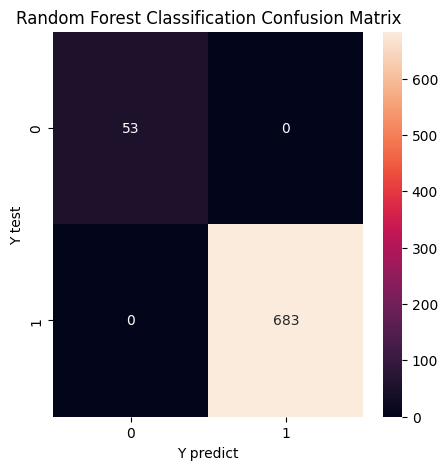

In [ ]:
#Confusion matrix
randforcla_com = confusion_matrix(Y_test,Y_predict)
f,ax = plt.subplots(figsize=(5,5))
sns.heatmap(randforcla_com, annot=True,fmt='g', ax=ax)
plt.title('Random Forest Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [ ]:
#KNN Classifier
x=Data1[['num_subscribers']]
y=Data1['subject']
print(x)
print(y)

      num_subscribers
0                2147
1                2792
2                2174
3                2451
4                1276
...               ...
3673             1040
3674              306
3675              513
3676              300
3677              901

[3678 rows x 1 columns]
0       2
1       2
2       2
3       2
4       2
       ..
3673    1
3674    1
3675    1
3676    1
3677    1
Name: subject, Length: 3678, dtype: int64


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10) #split our data with test size of 20%

In [ ]:
knn=KNeighborsClassifier(n_neighbors=50) #build our knn classifier
knn.fit(x_train,y_train) #Training KNN classifier
y_pred=knn.predict(x_test)  #Testing
print('Acuuracy=',accuracy_score(y_pred,y_test))

Acuuracy= 0.452445652173913


In [ ]:
n_neighbors=50
scores1=[]
for k in range(1,50):
    knn=KNeighborsClassifier(n_neighbors-k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    print('Accuracy for k=',k,'is:',round(accuracy_score(y_pred,y_test),2))
    scores1.append(round(accuracy_score(y_pred,y_test),2))

Accuracy for k= 1 is: 0.45
Accuracy for k= 2 is: 0.44
Accuracy for k= 3 is: 0.45
Accuracy for k= 4 is: 0.45
Accuracy for k= 5 is: 0.46
Accuracy for k= 6 is: 0.46
Accuracy for k= 7 is: 0.45
Accuracy for k= 8 is: 0.46
Accuracy for k= 9 is: 0.46
Accuracy for k= 10 is: 0.47
Accuracy for k= 11 is: 0.46
Accuracy for k= 12 is: 0.45
Accuracy for k= 13 is: 0.46
Accuracy for k= 14 is: 0.47
Accuracy for k= 15 is: 0.46
Accuracy for k= 16 is: 0.47
Accuracy for k= 17 is: 0.46
Accuracy for k= 18 is: 0.47
Accuracy for k= 19 is: 0.46
Accuracy for k= 20 is: 0.45
Accuracy for k= 21 is: 0.46
Accuracy for k= 22 is: 0.44
Accuracy for k= 23 is: 0.44
Accuracy for k= 24 is: 0.44
Accuracy for k= 25 is: 0.43
Accuracy for k= 26 is: 0.43
Accuracy for k= 27 is: 0.43
Accuracy for k= 28 is: 0.43
Accuracy for k= 29 is: 0.42
Accuracy for k= 30 is: 0.44
Accuracy for k= 31 is: 0.43
Accuracy for k= 32 is: 0.43
Accuracy for k= 33 is: 0.44
Accuracy for k= 34 is: 0.43
Accuracy for k= 35 is: 0.42
Accuracy for k= 36 is: 0.43
A

Text(0, 0.5, 'Testing Accuracy')

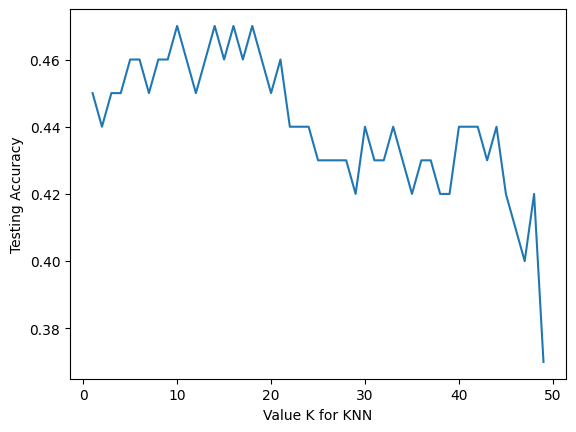

In [ ]:
plt.plot(range(1,50),scores1)
plt.xlabel('Value K for KNN')
plt.ylabel('Testing Accuracy')

In [ ]:
matrix = CountVectorizer().fit_transform(data['course_title']) #vectoriser le titre
matrix.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
cosine_sim_matrix = cosine_similarity(matrix)
cosine_sim_matrix # Similarity Matrix

array([[1.        , 0.1767767 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.1767767 , 1.        , 0.        , ..., 0.        , 0.125     ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.16903085, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.16903085, ..., 1.        , 0.        ,
        0.31622777],
       [0.        , 0.125     , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.31622777, 0.        ,
        1.        ]])

In [ ]:
udemycourses_ = pd.Series(data.index,index=data['course_title']).drop_duplicates()
udemycourses_


,0
course_title,
Ultimate Investment Banking Course,0
Complete GST Course & Certification - Grow Your CA Practice,1
Financial Modeling for Business Analysts and Consultants,2
Beginner to Pro - Financial Analysis in Excel 2017,3
How To Maximize Your Profits Trading Options,4
...,...
Learn jQuery from Scratch - Master of JavaScript library,3673
How To Design A WordPress Website With No Coding At All,3674
Learn and Build using Polymer,3675


In [ ]:
ind= udemycourses_["CSS Animations: Create Amazing Effects on Your Website"]
scores = list(enumerate(cosine_sim_matrix[ind]))
sorted_scores = sorted(scores,key=lambda x:x[1],reverse=True)

In [ ]:
selected_course_idx = [i[0] for i in sorted_scores[1:]]
recommended_result = data['course_title'].iloc[selected_course_idx]
recommended_result

,course_title
3639,create a search engine for your website!
3487,How To Create Your Very First Website With HTM...
1569,Create Beautiful Image Maps for Your Website
3028,jQuery for Beginners - Create Website Animatio...
3129,WordPress: Create an Amazing Website With Ease
...,...
3671,Build A Stock Downloader With Visual Studio 20...
3672,jQuery UI in Action: Build 5 jQuery UI Projects
3673,Learn jQuery from Scratch - Master of JavaScri...
3675,Learn and Build using Polymer


In [ ]:
recommend_df = pd.DataFrame(recommended_result)
recommend_df.head(10) #10 elements of the dataframe


,course_title
3639,create a search engine for your website!
3487,How To Create Your Very First Website With HTM...
1569,Create Beautiful Image Maps for Your Website
3028,jQuery for Beginners - Create Website Animatio...
3129,WordPress: Create an Amazing Website With Ease
2547,HTML CSS Learn to create a website from scratch
2946,Bootstrap Essential Training - Create Your Ver...
148,Save on Your Taxes
2529,Code your first Website using HTML & CSS: Proj...
2841,Hosting your static website on Amazon AWS S3 s...


# **Course Recommendation**

In [ ]:
def recommendation_system(title,num_of_rec=5):
  ind = udemycourses_[title]
  scores = list(enumerate(cosine_sim_matrix[ind])) #inside the cosine matrix
  sorted_scores = sorted(scores,key=lambda x : x[1],reverse = True)
  selected_course_idx = [i[0] for i in sorted_scores[1:]]
  selected_course_scores = [i[0] for i in sorted_scores[1:]]
  resultat = data['course_title'].iloc[selected_course_idx]
  recommend_df = pd.DataFrame(resultat)
  recommend_df['similarity_scores'] = selected_course_scores ##Recommendation
  return recommend_df.head(num_of_rec)

In [ ]:
recommendation_system('HTML CSS Learn to create a website from scratch')

,course_title,similarity_scores
2941,Web Design HTML CSS How to Create a Website fr...,2941
3356,Learn HTML And CSS From Scratch,3356
2799,"Learn HTML, A practical guide from scratch to ...",2799
2901,HTML CSS Easy steps to create a web template f...,2901
2729,Learn HTML and CSS to make a Website,2729
